In [69]:
import matplotlib.pyplot as plt
b1=0.005
b2=0.002
b3=0.004
w=0.3
a=0.3
g1=0.3
g2=0.3
lm=0.1
e=0.4

In [70]:
def susceptible(S, Is, In, R):
    global b1,b2,e,w,a #defining a global variable
    N = S + Is + In + R + C
    return (w*In+e*R-(b1*S*In)-(b2*S*Is)-(a*S))

In [71]:
def infected(S, Is, In,C):
     global b1,b2,b3,g1,lm
     return (b1*S*In + b3*C*In -(b2*In*Is)-(g1+lm)*In)

In [72]:
def infected_asym(S, Is,In,C):
     global b2,w
     return (b2*S*In + b2*In*Is +b2*C*Is -(w*Is))

In [73]:
def re(Is, In,C):
     global b2,g2,lm
     return (lm*In -(b3*C*In)-(b2*C*Is)-(g2*C))

In [74]:
def res(S,In,R,C):
    global g2,a,g1,e
    return(g2*C +a*S -(e*R) + g1*In)

In [75]:
def rk4(S, Is, In,C,R,n):

   #calculate step size
   h=0.002
   S_list = []
   Is_list = []
   In_list = []
   I_total = []
   C_list = []
   R_list =[]
  
   total = S + Is + In  + C + R
    
   for i in range(1, n):
      N = S + Is + In  + C + R
      lam = 1
      
      if ((i % 2) == 0):
          lam = 0.5

      k1 = h * (susceptible(S, Is, In, R))

      l1 = h * (infected(S, Is, In,C))
        
      la1 = h *(infected_asym(S, Is,In,C))
    
      m1 = h * (re(Is, In,C))
      n1 = h*(res(S,In,R,C))
  
      
      k2 = h * (susceptible((S+(k1)/2),(Is+(l1)/2), (In+(la1)/2), (R+(m1)/2)))
  
      l2 = h * (infected((S+(k1)/2),(Is+(l1)/2),(In+(la1)/2),(C+(m1)/2)))
      la2 = h * (infected_asym((S+(k1)/2), (Is+(l1)/2),(In+(la1)/2),(C+ (m1)/2)))
      m2 = h * (re((Is+(l1)/2), (In+(la1)/2),(C+ (m1)/2)))
      n2 = h*(res((S+(k1)/2),(In+(la1)/2),(R+(n1)/2),(C+(m1)/2)))
     
      
      k3 = h * (susceptible((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2), (R+(m2)/2)))
      l3 = h * (infected((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      la3 = h * (infected_asym((S+(k2)/2), (Is+(l2)/2),(In+(la2)/2),(C+(m2)/2)))
      m3 = h * (re((Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      n3 = h*(res((S+(k2)/2),(In+(la2)/2),(R+(n2)/2),(C+(m2)/2)))
      
      k4 = h * (susceptible((S+(k3)), (Is+(l3)), (In+(la3)), (R+(m3))))
      l4 = h * (infected((S+k3), (Is+l3),(In+la3),(C+m3)))
      la4 = h * (infected_asym((S+k3),(Is+l3),(In+la3),(C +m3)))
      m4 = h * (re((Is+l3),(In+la3),(C+m3)))
      n4 = h*(res((S+(k3)),(In +(la3)),(R+(n3)),(C+(m3))))
      
      k = (k1 + (2 * k2) + (2 * k3) + k4) / 6
      S = S + k
      
      l = (l1 + (2 * l2) + (2 * l3) + l4) / 6
      Is = Is + l
      
      la = (la1 + (2 * la2) + (2 * la3) + la4) / 6
      In = In + la
      
      m = (m1 + (2 * m2) + (2 * m3) + m4) / 6
      C = C + m
    
      nn = (n1 + (2 * n2) + (2 * n3) + n4) / 6
      R = R + nn
      
    

      S_list.append(S)
      Is_list.append(Is)
      In_list.append(In)
      I_total.append((Is + In))
      C_list.append(C)
      R_list.append(R)
  
      
      if((S < 0) or (Is < 0) or (In < 0) or (C < 0) or (R<0) ):
         S = S - k
         Is = Is - l
         In = In - la
         C = C - m
         R = R - nn
    
         break
   peak_infections_index = I_total.index(max(I_total))

   plt.plot(list(range(len(S_list))), S_list, color = 'green')
   plt.plot(list(range(len(I_total))), I_total, color = 'brown')
   plt.plot(list(range(len(Is_list))), Is_list, color = 'red')
   plt.plot(list(range(len(In_list))), In_list, color = 'orange')
   plt.plot(list(range(len(C_list))), C_list, color = 'blue')
   plt.plot(list(range(len(R_list))), R_list, color = 'black')
  
  
   plt.gca().legend(['Susceptible', 'Infected - Total', 'Infected - systemic risk', 'Infected - Not systemic risk', 'Carrier', 'Recovered','w=10'])
   plt.title('SIR using Differential equations - Symptomatic and Asymptomatic Infected ')
   plt.rcParams["figure.figsize"] = (20,6)
   plt.xlabel("Time Period")
   plt.ylabel("Population N")
   plt.text(2200,550,"b1=0.005")
   plt.text(2200,510,"b2=0.002")
   plt.text(2200,480,"b3=0.004")
   plt.text(2200,450,"w=0.3")
   plt.text(2200,420,"a=0.3")
   plt.text(2200,390,"g1=0.3")
   plt.text(2200,350,"g2=0.3")
   plt.text(2200,300,"lm=0.1")
   plt.text(2200,270,"e=0.4")
   plt.show()

In [76]:
S = 900 #Defining the parameter of the function
Is = 1
In = 9
C = 5
R=0
n = 15000

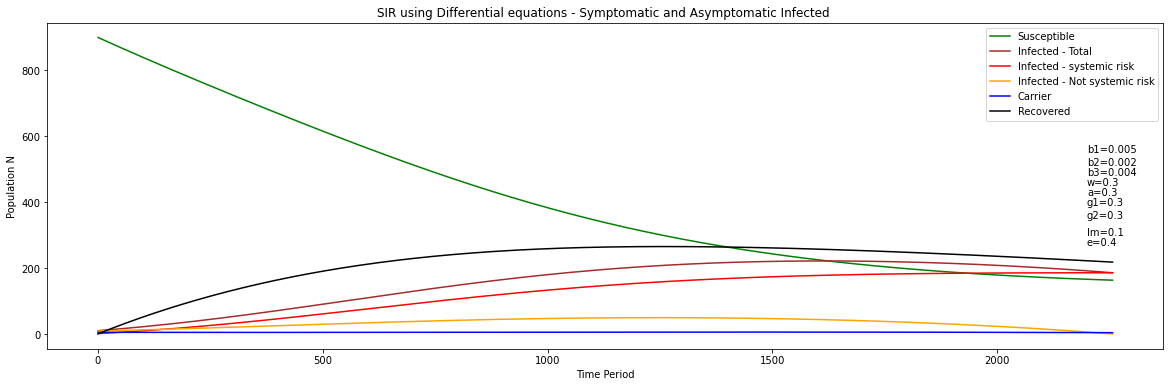

In [77]:
rk4(S, Is, In, C, R,n)

In [113]:
def rk4(S, Is, In,C,R,n):

   #calculate step size
   h=0.002
   S_list = []
   Is_list = []
   In_list = []
   I_total = []
   C_list = []
   R_list =[]
  
   total = S + Is + In  + C + R
    
   for i in range(1, n):
      N = S + Is + In  + C + R
      lam = 1
      
      if ((i % 2) == 0):
          lam = 0.5

      k1 = h * (susceptible(S, Is, In, R))

      l1 = h * (infected(S, Is, In,C))
        
      la1 = h *(infected_asym(S, Is,In,C))
    
      m1 = h * (re(Is, In,C))
      n1 = h*(res(S,In,R,C))
  
      
      k2 = h * (susceptible((S+(k1)/2),(Is+(l1)/2), (In+(la1)/2), (R+(m1)/2)))
  
      l2 = h * (infected((S+(k1)/2),(Is+(l1)/2),(In+(la1)/2),(C+(m1)/2)))
      la2 = h * (infected_asym((S+(k1)/2), (Is+(l1)/2),(In+(la1)/2),(C+ (m1)/2)))
      m2 = h * (re((Is+(l1)/2), (In+(la1)/2),(C+ (m1)/2)))
      n2 = h*(res((S+(k1)/2),(In+(la1)/2),(R+(n1)/2),(C+(m1)/2)))
     
      
      k3 = h * (susceptible((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2), (R+(m2)/2)))
      l3 = h * (infected((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      la3 = h * (infected_asym((S+(k2)/2), (Is+(l2)/2),(In+(la2)/2),(C+(m2)/2)))
      m3 = h * (re((Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      n3 = h*(res((S+(k2)/2),(In+(la2)/2),(R+(n2)/2),(C+(m2)/2)))
      
      k4 = h * (susceptible((S+(k3)), (Is+(l3)), (In+(la3)), (R+(m3))))
      l4 = h * (infected((S+k3), (Is+l3),(In+la3),(C+m3)))
      la4 = h * (infected_asym((S+k3),(Is+l3),(In+la3),(C +m3)))
      m4 = h * (re((Is+l3),(In+la3),(C+m3)))
      n4 = h*(res((S+(k3)),(In +(la3)),(R+(n3)),(C+(m3))))
      
      k = (k1 + (2 * k2) + (2 * k3) + k4) / 6
      S = S + k
      
      l = (l1 + (2 * l2) + (2 * l3) + l4) / 6
      Is = Is + l
      
      la = (la1 + (2 * la2) + (2 * la3) + la4) / 6
      In = In + la
      
      m = (m1 + (2 * m2) + (2 * m3) + m4) / 6
      C = C + m
    
      nn = (n1 + (2 * n2) + (2 * n3) + n4) / 6
      R = R + nn
      
    

      S_list.append(S)
      Is_list.append(Is)
      In_list.append(In)
      I_total.append((Is + In))
      C_list.append(C)
      R_list.append(R)
  
      
      if((S < 0) or (Is < 0) or (In < 0) or (C < 0) or (R<0) ):
         S = S - k
         Is = Is - l
         In = In - la
         C = C - m
         R = R - nn
    
         break
   peak_infections_index = I_total.index(max(I_total))

   plt.plot(list(range(len(S_list))), S_list, color = 'green')
   plt.plot(list(range(len(I_total))), I_total, color = 'brown')
   plt.plot(list(range(len(Is_list))), Is_list, color = 'red')
   plt.plot(list(range(len(In_list))), In_list, color = 'orange')
   plt.plot(list(range(len(C_list))), C_list, color = 'blue')
   plt.plot(list(range(len(R_list))), R_list, color = 'black')
  
  
   plt.gca().legend(['Susceptible', 'Infected - Total', 'Infected - systemic risk', 'Infected - Not systemic risk', 'Carrier', 'Recovered','w=10'])
   plt.title('SIR using Differential equations - Symptomatic and Asymptomatic Infected ')
   plt.rcParams["figure.figsize"] = (20,6)
   plt.xlabel("Time Period")
   plt.ylabel("Population N")
   plt.text(350,2800,"b1=0.005")
   plt.text(350,2500,"b2=0.002")
   plt.text(350,2200,"b3=0.04")
   plt.text(350,1900,"w=0.035")
   plt.text(350,1600,"a=0.4")
   plt.text(350,1300,"g1=0.3")
   plt.text(350,1000,"g2=0.3")
   plt.text(350,7000,"lm=0.1")
   plt.text(350,4000,"e=0.56")
   plt.show()
   plt.show()

In [114]:
####### Change the values of parameter
b1=0.005
b2=0.002
b3=0.04
w=0.035
a=0.4
g1=0.3
g2=0.3
lm=0.1
e=0.56
###########################
S = 9000 #Defining the parameter of the function
Is = 1
In = 9
C = 5
R=0
n = 15000

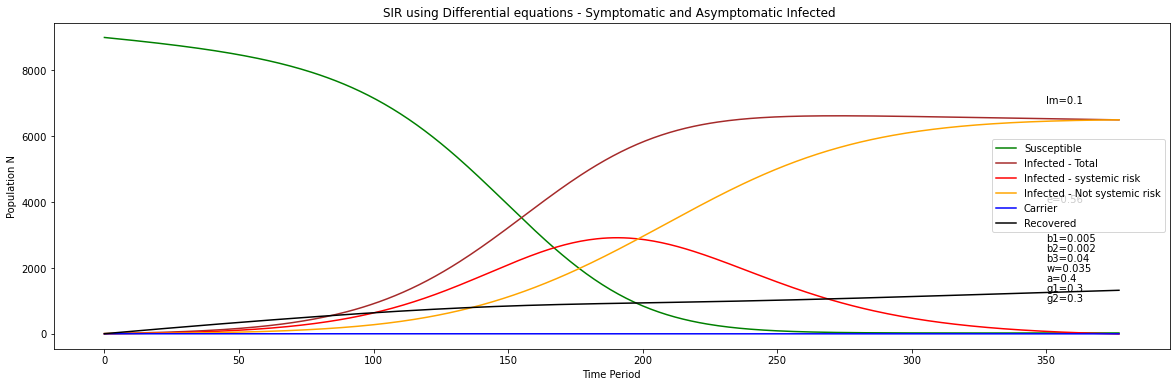

In [115]:
rk4(S, Is, In, C, R,n)

In [122]:
def rk4(S, Is, In,C,R,n):

   #calculate step size
   h=0.002
   S_list = []
   Is_list = []
   In_list = []
   I_total = []
   C_list = []
   R_list =[]
  
   total = S + Is + In  + C + R
    
   for i in range(1, n):
      N = S + Is + In  + C + R
      lam = 1
      
      if ((i % 2) == 0):
          lam = 0.5

      k1 = h * (susceptible(S, Is, In, R))

      l1 = h * (infected(S, Is, In,C))
        
      la1 = h *(infected_asym(S, Is,In,C))
    
      m1 = h * (re(Is, In,C))
      n1 = h*(res(S,In,R,C))
  
      
      k2 = h * (susceptible((S+(k1)/2),(Is+(l1)/2), (In+(la1)/2), (R+(m1)/2)))
  
      l2 = h * (infected((S+(k1)/2),(Is+(l1)/2),(In+(la1)/2),(C+(m1)/2)))
      la2 = h * (infected_asym((S+(k1)/2), (Is+(l1)/2),(In+(la1)/2),(C+ (m1)/2)))
      m2 = h * (re((Is+(l1)/2), (In+(la1)/2),(C+ (m1)/2)))
      n2 = h*(res((S+(k1)/2),(In+(la1)/2),(R+(n1)/2),(C+(m1)/2)))
     
      
      k3 = h * (susceptible((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2), (R+(m2)/2)))
      l3 = h * (infected((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      la3 = h * (infected_asym((S+(k2)/2), (Is+(l2)/2),(In+(la2)/2),(C+(m2)/2)))
      m3 = h * (re((Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      n3 = h*(res((S+(k2)/2),(In+(la2)/2),(R+(n2)/2),(C+(m2)/2)))
      
      k4 = h * (susceptible((S+(k3)), (Is+(l3)), (In+(la3)), (R+(m3))))
      l4 = h * (infected((S+k3), (Is+l3),(In+la3),(C+m3)))
      la4 = h * (infected_asym((S+k3),(Is+l3),(In+la3),(C +m3)))
      m4 = h * (re((Is+l3),(In+la3),(C+m3)))
      n4 = h*(res((S+(k3)),(In +(la3)),(R+(n3)),(C+(m3))))
      
      k = (k1 + (2 * k2) + (2 * k3) + k4) / 6
      S = S + k
      
      l = (l1 + (2 * l2) + (2 * l3) + l4) / 6
      Is = Is + l
      
      la = (la1 + (2 * la2) + (2 * la3) + la4) / 6
      In = In + la
      
      m = (m1 + (2 * m2) + (2 * m3) + m4) / 6
      C = C + m
    
      nn = (n1 + (2 * n2) + (2 * n3) + n4) / 6
      R = R + nn
      
    

      S_list.append(S)
      Is_list.append(Is)
      In_list.append(In)
      I_total.append((Is + In))
      C_list.append(C)
      R_list.append(R)
  
      
      if((S < 0) or (Is < 0) or (In < 0) or (C < 0) or (R<0) ):
         S = S - k
         Is = Is - l
         In = In - la
         C = C - m
         R = R - nn
    
         break
   peak_infections_index = I_total.index(max(I_total))

   plt.plot(list(range(len(S_list))), S_list, color = 'green')
   plt.plot(list(range(len(I_total))), I_total, color = 'brown')
   plt.plot(list(range(len(Is_list))), Is_list, color = 'red')
   plt.plot(list(range(len(In_list))), In_list, color = 'orange')
   plt.plot(list(range(len(C_list))), C_list, color = 'blue')
   plt.plot(list(range(len(R_list))), R_list, color = 'black')
  
  
   plt.gca().legend(['Susceptible', 'Infected - Total', 'Infected - systemic risk', 'Infected - Not systemic risk', 'Carrier', 'Recovered','w=10'])
   plt.title('SIR using Differential equations - Symptomatic and Asymptomatic Infected ')
   plt.rcParams["figure.figsize"] = (20,6)
   plt.xlabel("Time Period")
   plt.ylabel("Population N")
   plt.text(350,17000,"b1=0.0005")
   plt.text(350,16200,"b2=0.0002")
   plt.text(350,15400,"b3=0.04")
   plt.text(350,14600,"w=0.035")
   plt.text(350,13800,"a=0.4")
   plt.text(350,13000,"g1=0.03")
   plt.text(350,12200,"g2=0.3")
   plt.text(350,11400,"lm=0.1")
   plt.text(350,10600,"e=0.5")
   plt.show()
   plt.show()

In [123]:
############ Change the values of parameter
b1=0.0005
b2=0.0002
b3=0.04
w=0.035
a=0.4
g1=0.03
g2=0.3
lm=0.1
e=0.5
###########################
S = 9000 #Defining the parameter of the function
Is = 1
In = 9
C = 5
R=0
n = 15000

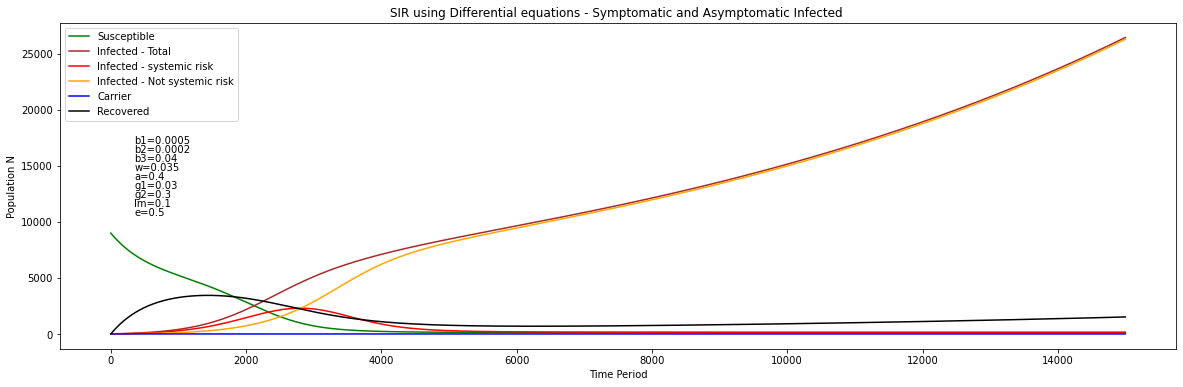

In [124]:
rk4(S, Is, In, C, R,n)

In [127]:
def rk4(S, Is, In,C,R,n):

   #calculate step size
   h=0.002
   S_list = []
   Is_list = []
   In_list = []
   I_total = []
   C_list = []
   R_list =[]
  
   total = S + Is + In  + C + R
    
   for i in range(1, n):
      N = S + Is + In  + C + R
      lam = 1
      
      if ((i % 2) == 0):
          lam = 0.5

      k1 = h * (susceptible(S, Is, In, R))

      l1 = h * (infected(S, Is, In,C))
        
      la1 = h *(infected_asym(S, Is,In,C))
    
      m1 = h * (re(Is, In,C))
      n1 = h*(res(S,In,R,C))
  
      
      k2 = h * (susceptible((S+(k1)/2),(Is+(l1)/2), (In+(la1)/2), (R+(m1)/2)))
  
      l2 = h * (infected((S+(k1)/2),(Is+(l1)/2),(In+(la1)/2),(C+(m1)/2)))
      la2 = h * (infected_asym((S+(k1)/2), (Is+(l1)/2),(In+(la1)/2),(C+ (m1)/2)))
      m2 = h * (re((Is+(l1)/2), (In+(la1)/2),(C+ (m1)/2)))
      n2 = h*(res((S+(k1)/2),(In+(la1)/2),(R+(n1)/2),(C+(m1)/2)))
     
      
      k3 = h * (susceptible((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2), (R+(m2)/2)))
      l3 = h * (infected((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      la3 = h * (infected_asym((S+(k2)/2), (Is+(l2)/2),(In+(la2)/2),(C+(m2)/2)))
      m3 = h * (re((Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      n3 = h*(res((S+(k2)/2),(In+(la2)/2),(R+(n2)/2),(C+(m2)/2)))
      
      k4 = h * (susceptible((S+(k3)), (Is+(l3)), (In+(la3)), (R+(m3))))
      l4 = h * (infected((S+k3), (Is+l3),(In+la3),(C+m3)))
      la4 = h * (infected_asym((S+k3),(Is+l3),(In+la3),(C +m3)))
      m4 = h * (re((Is+l3),(In+la3),(C+m3)))
      n4 = h*(res((S+(k3)),(In +(la3)),(R+(n3)),(C+(m3))))
      
      k = (k1 + (2 * k2) + (2 * k3) + k4) / 6
      S = S + k
      
      l = (l1 + (2 * l2) + (2 * l3) + l4) / 6
      Is = Is + l
      
      la = (la1 + (2 * la2) + (2 * la3) + la4) / 6
      In = In + la
      
      m = (m1 + (2 * m2) + (2 * m3) + m4) / 6
      C = C + m
    
      nn = (n1 + (2 * n2) + (2 * n3) + n4) / 6
      R = R + nn
      
    

      S_list.append(S)
      Is_list.append(Is)
      In_list.append(In)
      I_total.append((Is + In))
      C_list.append(C)
      R_list.append(R)
  
      
      if((S < 0) or (Is < 0) or (In < 0) or (C < 0) or (R<0) ):
         S = S - k
         Is = Is - l
         In = In - la
         C = C - m
         R = R - nn
    
         break
   peak_infections_index = I_total.index(max(I_total))

   plt.plot(list(range(len(S_list))), S_list, color = 'green')
   plt.plot(list(range(len(I_total))), I_total, color = 'brown')
   plt.plot(list(range(len(Is_list))), Is_list, color = 'red')
   plt.plot(list(range(len(In_list))), In_list, color = 'orange')
   plt.plot(list(range(len(C_list))), C_list, color = 'blue')
   plt.plot(list(range(len(R_list))), R_list, color = 'black')
  
  
   plt.gca().legend(['Susceptible', 'Infected - Total', 'Infected - systemic risk', 'Infected - Not systemic risk', 'Carrier', 'Recovered','w=10'])
   plt.title('SIR using Differential equations - Symptomatic and Asymptomatic Infected ')
   plt.rcParams["figure.figsize"] = (20,6)
   plt.xlabel("Time Period")
   plt.ylabel("Population N")
   plt.text(10000,9000,"b1=0.0005")
   plt.text(10000,8500,"b2=0.0002")
   plt.text(10000,8000,"b3=0.04")
   plt.text(10000,7500,"w=0.035")
   plt.text(10000,7000,"a=0.45")
   plt.text(10000,6500,"g1=0.03")
   plt.text(10000,6000,"g2=0.03")
   plt.text(10000,5500,"lm=0.1")
   plt.text(10000,5000,"e=0.05")
   plt.show()
   plt.show()

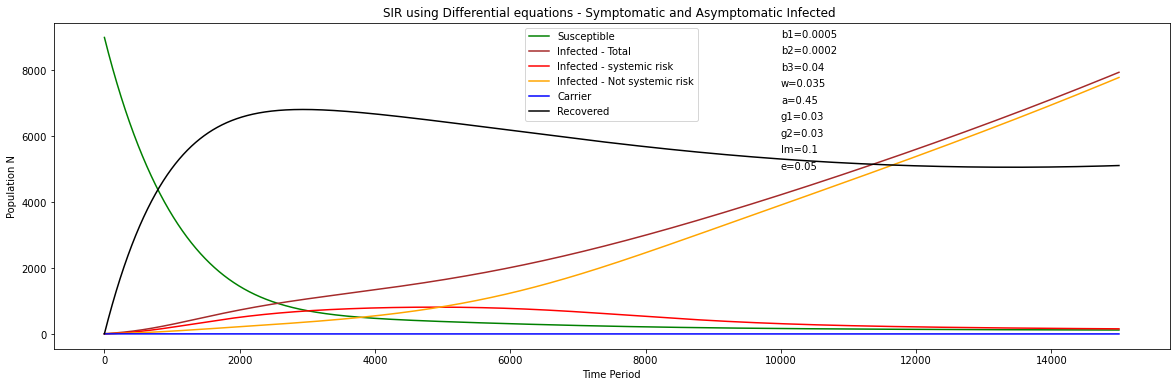

In [128]:
############ Change the values of parameter
b1=0.0005
b2=0.0002
b3=0.04
w=0.035
a=0.45
g1=0.03
g2=0.03
lm=0.1
e=0.05
###########################
S = 9000 #Defining the parameter of the function
Is = 1
In = 9
C = 5
R=0
n = 15000
############ plot
rk4(S, Is, In, C, R,n)

In [135]:
def rk4(S, Is, In,C,R,n):

   #calculate step size
   h=0.002
   S_list = []
   Is_list = []
   In_list = []
   I_total = []
   C_list = []
   R_list =[]
  
   total = S + Is + In  + C + R
    
   for i in range(1, n):
      N = S + Is + In  + C + R
      lam = 1
      
      if ((i % 2) == 0):
          lam = 0.5

      k1 = h * (susceptible(S, Is, In, R))

      l1 = h * (infected(S, Is, In,C))
        
      la1 = h *(infected_asym(S, Is,In,C))
    
      m1 = h * (re(Is, In,C))
      n1 = h*(res(S,In,R,C))
  
      
      k2 = h * (susceptible((S+(k1)/2),(Is+(l1)/2), (In+(la1)/2), (R+(m1)/2)))
  
      l2 = h * (infected((S+(k1)/2),(Is+(l1)/2),(In+(la1)/2),(C+(m1)/2)))
      la2 = h * (infected_asym((S+(k1)/2), (Is+(l1)/2),(In+(la1)/2),(C+ (m1)/2)))
      m2 = h * (re((Is+(l1)/2), (In+(la1)/2),(C+ (m1)/2)))
      n2 = h*(res((S+(k1)/2),(In+(la1)/2),(R+(n1)/2),(C+(m1)/2)))
     
      
      k3 = h * (susceptible((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2), (R+(m2)/2)))
      l3 = h * (infected((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      la3 = h * (infected_asym((S+(k2)/2), (Is+(l2)/2),(In+(la2)/2),(C+(m2)/2)))
      m3 = h * (re((Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      n3 = h*(res((S+(k2)/2),(In+(la2)/2),(R+(n2)/2),(C+(m2)/2)))
      
      k4 = h * (susceptible((S+(k3)), (Is+(l3)), (In+(la3)), (R+(m3))))
      l4 = h * (infected((S+k3), (Is+l3),(In+la3),(C+m3)))
      la4 = h * (infected_asym((S+k3),(Is+l3),(In+la3),(C +m3)))
      m4 = h * (re((Is+l3),(In+la3),(C+m3)))
      n4 = h*(res((S+(k3)),(In +(la3)),(R+(n3)),(C+(m3))))
      
      k = (k1 + (2 * k2) + (2 * k3) + k4) / 6
      S = S + k
      
      l = (l1 + (2 * l2) + (2 * l3) + l4) / 6
      Is = Is + l
      
      la = (la1 + (2 * la2) + (2 * la3) + la4) / 6
      In = In + la
      
      m = (m1 + (2 * m2) + (2 * m3) + m4) / 6
      C = C + m
    
      nn = (n1 + (2 * n2) + (2 * n3) + n4) / 6
      R = R + nn
      
    

      S_list.append(S)
      Is_list.append(Is)
      In_list.append(In)
      I_total.append((Is + In))
      C_list.append(C)
      R_list.append(R)
  
      
      if((S < 0) or (Is < 0) or (In < 0) or (C < 0) or (R<0) ):
         S = S - k
         Is = Is - l
         In = In - la
         C = C - m
         R = R - nn
    
         break
   peak_infections_index = I_total.index(max(I_total))

   plt.plot(list(range(len(S_list))), S_list, color = 'green')
   plt.plot(list(range(len(I_total))), I_total, color = 'brown')
   plt.plot(list(range(len(Is_list))), Is_list, color = 'red')
   plt.plot(list(range(len(In_list))), In_list, color = 'orange')
   plt.plot(list(range(len(C_list))), C_list, color = 'blue')
   plt.plot(list(range(len(R_list))), R_list, color = 'black')
  
  
   plt.gca().legend(['Susceptible', 'Infected - Total', 'Infected - systemic risk', 'Infected - Not systemic risk', 'Carrier', 'Recovered','w=10'])
   plt.title('SIR using Differential equations - Symptomatic and Asymptomatic Infected ')
   plt.rcParams["figure.figsize"] = (20,6)
   plt.xlabel("Time Period")
   plt.ylabel("Population N")
   plt.text(1000,20000,"b1=0.0006")
   plt.text(1000,19000,"b2=0.0005")
   plt.text(1000,18000,"b3=0.03")
   plt.text(1000,17000,"w=0.035")
   plt.text(1000,16000,"a=0.49")
   plt.text(1000,15000,"g1=0.03")
   plt.text(1000,14000,"g2=0.03")
   plt.text(1000,13000,"lm=0.15")
   plt.text(1000,12000,"e=0.05")
   plt.show()
   plt.show()

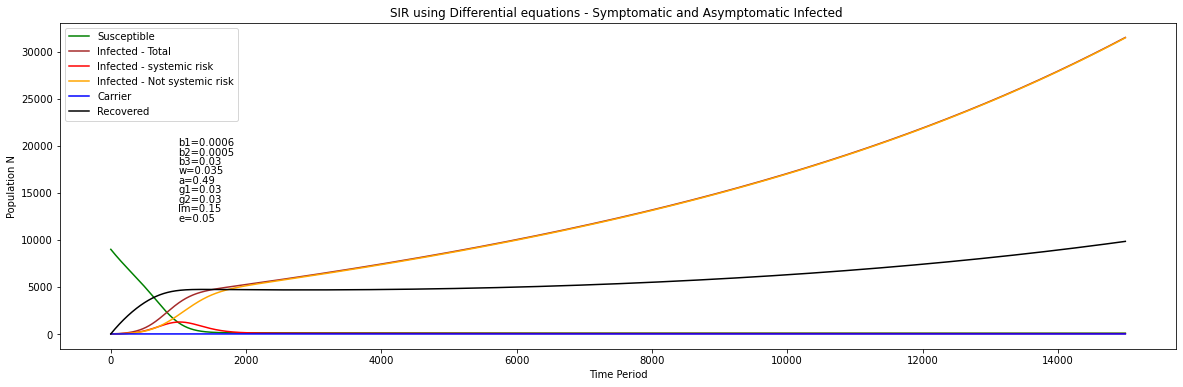

In [136]:
############ Change the values of parameter
b1=0.0006
b2=0.0005
b3=0.03
w=0.035
a=0.49
g1=0.03
g2=0.03
lm=0.15
e=0.05
###########################
S = 9000 #Defining the parameter of the function
Is = 1
In = 9
C = 5
R=0
n = 15000
############ plot
rk4(S, Is, In, C, R,n)

In [142]:
def rk4(S, Is, In,C,R,n):

   #calculate step size
   h=0.002
   S_list = []
   Is_list = []
   In_list = []
   I_total = []
   C_list = []
   R_list =[]
  
   total = S + Is + In  + C + R
    
   for i in range(1, n):
      N = S + Is + In  + C + R
      lam = 1
      
      if ((i % 2) == 0):
          lam = 0.5

      k1 = h * (susceptible(S, Is, In, R))

      l1 = h * (infected(S, Is, In,C))
        
      la1 = h *(infected_asym(S, Is,In,C))
    
      m1 = h * (re(Is, In,C))
      n1 = h*(res(S,In,R,C))
  
      
      k2 = h * (susceptible((S+(k1)/2),(Is+(l1)/2), (In+(la1)/2), (R+(m1)/2)))
  
      l2 = h * (infected((S+(k1)/2),(Is+(l1)/2),(In+(la1)/2),(C+(m1)/2)))
      la2 = h * (infected_asym((S+(k1)/2), (Is+(l1)/2),(In+(la1)/2),(C+ (m1)/2)))
      m2 = h * (re((Is+(l1)/2), (In+(la1)/2),(C+ (m1)/2)))
      n2 = h*(res((S+(k1)/2),(In+(la1)/2),(R+(n1)/2),(C+(m1)/2)))
     
      
      k3 = h * (susceptible((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2), (R+(m2)/2)))
      l3 = h * (infected((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      la3 = h * (infected_asym((S+(k2)/2), (Is+(l2)/2),(In+(la2)/2),(C+(m2)/2)))
      m3 = h * (re((Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      n3 = h*(res((S+(k2)/2),(In+(la2)/2),(R+(n2)/2),(C+(m2)/2)))
      
      k4 = h * (susceptible((S+(k3)), (Is+(l3)), (In+(la3)), (R+(m3))))
      l4 = h * (infected((S+k3), (Is+l3),(In+la3),(C+m3)))
      la4 = h * (infected_asym((S+k3),(Is+l3),(In+la3),(C +m3)))
      m4 = h * (re((Is+l3),(In+la3),(C+m3)))
      n4 = h*(res((S+(k3)),(In +(la3)),(R+(n3)),(C+(m3))))
      
      k = (k1 + (2 * k2) + (2 * k3) + k4) / 6
      S = S + k
      
      l = (l1 + (2 * l2) + (2 * l3) + l4) / 6
      Is = Is + l
      
      la = (la1 + (2 * la2) + (2 * la3) + la4) / 6
      In = In + la
      
      m = (m1 + (2 * m2) + (2 * m3) + m4) / 6
      C = C + m
    
      nn = (n1 + (2 * n2) + (2 * n3) + n4) / 6
      R = R + nn
      
    

      S_list.append(S)
      Is_list.append(Is)
      In_list.append(In)
      I_total.append((Is + In))
      C_list.append(C)
      R_list.append(R)
  
      
      if((S < 0) or (Is < 0) or (In < 0) or (C < 0) or (R<0) ):
         S = S - k
         Is = Is - l
         In = In - la
         C = C - m
         R = R - nn
    
         break
   peak_infections_index = I_total.index(max(I_total))

   plt.plot(list(range(len(S_list))), S_list, color = 'green')
   plt.plot(list(range(len(I_total))), I_total, color = 'brown')
   plt.plot(list(range(len(Is_list))), Is_list, color = 'red')
   plt.plot(list(range(len(In_list))), In_list, color = 'orange')
   plt.plot(list(range(len(C_list))), C_list, color = 'blue')
   plt.plot(list(range(len(R_list))), R_list, color = 'black')
  
  
   plt.gca().legend(['Susceptible', 'Infected - Total', 'Infected - systemic risk', 'Infected - Not systemic risk', 'Carrier', 'Recovered','w=10'])
   plt.title('SIR using Differential equations - Symptomatic and Asymptomatic Infected ')
   plt.rcParams["figure.figsize"] = (20,6)
   plt.xlabel("Time Period")
   plt.ylabel("Population N")
   plt.text(500,15000,"b1=0.0001")
   plt.text(500,14000,"b2=0.0002")
   plt.text(500,13000,"b3=0.01")
   plt.text(500,12000,"w=0.035")
   plt.text(500,11000,"a=0.457")
   plt.text(500,10000,"g1=0.003")
   plt.text(500,9000,"g2=0.03")
   plt.text(500,8000,"lm=0.01")
   plt.text(500,7000,"e=0.05")
   plt.show()
   plt.show()

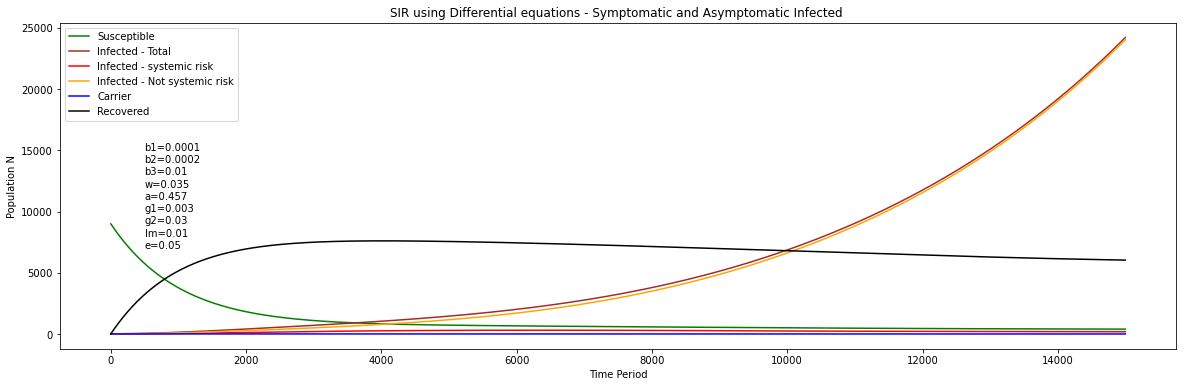

In [143]:
############ Change the values of parameter
b1=0.0001
b2=0.0002
b3=0.01
w=0.035
a=0.457
g1=0.003
g2=0.03
lm=0.01
e=0.05
###########################
S = 9000 #Defining the parameter of the function
Is = 1
In = 9
C = 5
R=0
n = 15000
############ plot
rk4(S, Is, In, C, R,n)

In [146]:
def rk4(S, Is, In,C,R,n):

   #calculate step size
   h=0.002
   S_list = []
   Is_list = []
   In_list = []
   I_total = []
   C_list = []
   R_list =[]
  
   total = S + Is + In  + C + R
    
   for i in range(1, n):
      N = S + Is + In  + C + R
      lam = 1
      
      if ((i % 2) == 0):
          lam = 0.5

      k1 = h * (susceptible(S, Is, In, R))

      l1 = h * (infected(S, Is, In,C))
        
      la1 = h *(infected_asym(S, Is,In,C))
    
      m1 = h * (re(Is, In,C))
      n1 = h*(res(S,In,R,C))
  
      
      k2 = h * (susceptible((S+(k1)/2),(Is+(l1)/2), (In+(la1)/2), (R+(m1)/2)))
  
      l2 = h * (infected((S+(k1)/2),(Is+(l1)/2),(In+(la1)/2),(C+(m1)/2)))
      la2 = h * (infected_asym((S+(k1)/2), (Is+(l1)/2),(In+(la1)/2),(C+ (m1)/2)))
      m2 = h * (re((Is+(l1)/2), (In+(la1)/2),(C+ (m1)/2)))
      n2 = h*(res((S+(k1)/2),(In+(la1)/2),(R+(n1)/2),(C+(m1)/2)))
     
      
      k3 = h * (susceptible((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2), (R+(m2)/2)))
      l3 = h * (infected((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      la3 = h * (infected_asym((S+(k2)/2), (Is+(l2)/2),(In+(la2)/2),(C+(m2)/2)))
      m3 = h * (re((Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      n3 = h*(res((S+(k2)/2),(In+(la2)/2),(R+(n2)/2),(C+(m2)/2)))
      
      k4 = h * (susceptible((S+(k3)), (Is+(l3)), (In+(la3)), (R+(m3))))
      l4 = h * (infected((S+k3), (Is+l3),(In+la3),(C+m3)))
      la4 = h * (infected_asym((S+k3),(Is+l3),(In+la3),(C +m3)))
      m4 = h * (re((Is+l3),(In+la3),(C+m3)))
      n4 = h*(res((S+(k3)),(In +(la3)),(R+(n3)),(C+(m3))))
      
      k = (k1 + (2 * k2) + (2 * k3) + k4) / 6
      S = S + k
      
      l = (l1 + (2 * l2) + (2 * l3) + l4) / 6
      Is = Is + l
      
      la = (la1 + (2 * la2) + (2 * la3) + la4) / 6
      In = In + la
      
      m = (m1 + (2 * m2) + (2 * m3) + m4) / 6
      C = C + m
    
      nn = (n1 + (2 * n2) + (2 * n3) + n4) / 6
      R = R + nn
      
    

      S_list.append(S)
      Is_list.append(Is)
      In_list.append(In)
      I_total.append((Is + In))
      C_list.append(C)
      R_list.append(R)
  
      
      if((S < 0) or (Is < 0) or (In < 0) or (C < 0) or (R<0) ):
         S = S - k
         Is = Is - l
         In = In - la
         C = C - m
         R = R - nn
    
         break
   peak_infections_index = I_total.index(max(I_total))

   plt.plot(list(range(len(S_list))), S_list, color = 'green')
   plt.plot(list(range(len(I_total))), I_total, color = 'brown')
   plt.plot(list(range(len(Is_list))), Is_list, color = 'red')
   plt.plot(list(range(len(In_list))), In_list, color = 'orange')
   plt.plot(list(range(len(C_list))), C_list, color = 'blue')
   plt.plot(list(range(len(R_list))), R_list, color = 'black')
  
  
   plt.gca().legend(['Susceptible', 'Infected - Total', 'Infected - systemic risk', 'Infected - Not systemic risk', 'Carrier', 'Recovered','w=10'])
   plt.title('SIR using Differential equations - Symptomatic and Asymptomatic Infected ')
   plt.rcParams["figure.figsize"] = (20,6)
   plt.xlabel("Time Period")
   plt.ylabel("Population N")
   plt.text(500,20000,"b1=0.05")
   plt.text(500,19000,"b2=0.02")
   plt.text(500,18000,"b3=0.014")
   plt.text(500,17000,"w=0.05")
   plt.text(500,16000,"a=0.045")
   plt.text(500,15000,"g1=0.03")
   plt.text(500,14000,"g2=0.013")
   plt.text(500,13000,"lm=0.1")
   plt.text(500,12000,"e=0.05")
   plt.show()
   plt.show()

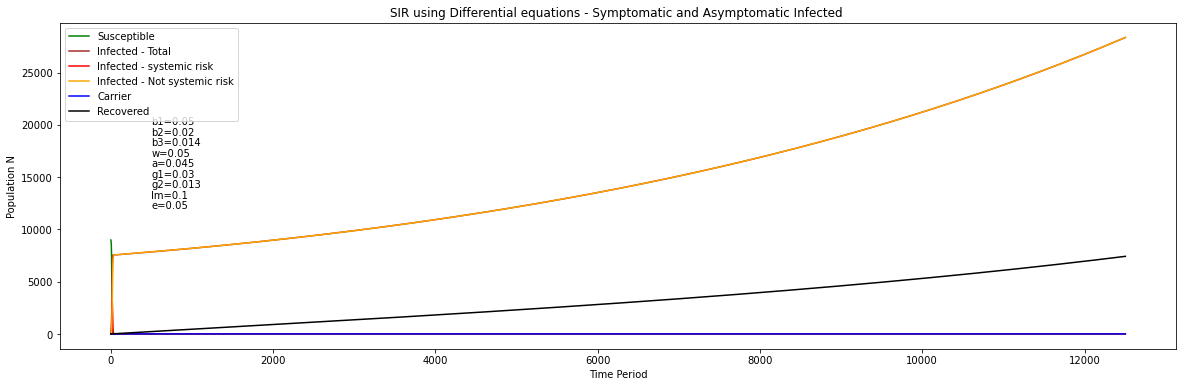

In [147]:
############ Change the values of parameter
b1=0.05
b2=0.02
b3=0.014
w=0.05
a=0.045
g1=0.03
g2=0.013
lm=0.1
e=0.05
###########################
S = 9000 #Defining the parameter of the function
Is = 1
In = 9
C = 5
R=0
n = 15000
############ plot
rk4(S, Is, In, C, R,n)

In [150]:
def rk4(S, Is, In,C,R,n):

   #calculate step size
   h=0.002
   S_list = []
   Is_list = []
   In_list = []
   I_total = []
   C_list = []
   R_list =[]
  
   total = S + Is + In  + C + R
    
   for i in range(1, n):
      N = S + Is + In  + C + R
      lam = 1
      
      if ((i % 2) == 0):
          lam = 0.5

      k1 = h * (susceptible(S, Is, In, R))

      l1 = h * (infected(S, Is, In,C))
        
      la1 = h *(infected_asym(S, Is,In,C))
    
      m1 = h * (re(Is, In,C))
      n1 = h*(res(S,In,R,C))
  
      
      k2 = h * (susceptible((S+(k1)/2),(Is+(l1)/2), (In+(la1)/2), (R+(m1)/2)))
  
      l2 = h * (infected((S+(k1)/2),(Is+(l1)/2),(In+(la1)/2),(C+(m1)/2)))
      la2 = h * (infected_asym((S+(k1)/2), (Is+(l1)/2),(In+(la1)/2),(C+ (m1)/2)))
      m2 = h * (re((Is+(l1)/2), (In+(la1)/2),(C+ (m1)/2)))
      n2 = h*(res((S+(k1)/2),(In+(la1)/2),(R+(n1)/2),(C+(m1)/2)))
     
      
      k3 = h * (susceptible((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2), (R+(m2)/2)))
      l3 = h * (infected((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      la3 = h * (infected_asym((S+(k2)/2), (Is+(l2)/2),(In+(la2)/2),(C+(m2)/2)))
      m3 = h * (re((Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      n3 = h*(res((S+(k2)/2),(In+(la2)/2),(R+(n2)/2),(C+(m2)/2)))
      
      k4 = h * (susceptible((S+(k3)), (Is+(l3)), (In+(la3)), (R+(m3))))
      l4 = h * (infected((S+k3), (Is+l3),(In+la3),(C+m3)))
      la4 = h * (infected_asym((S+k3),(Is+l3),(In+la3),(C +m3)))
      m4 = h * (re((Is+l3),(In+la3),(C+m3)))
      n4 = h*(res((S+(k3)),(In +(la3)),(R+(n3)),(C+(m3))))
      
      k = (k1 + (2 * k2) + (2 * k3) + k4) / 6
      S = S + k
      
      l = (l1 + (2 * l2) + (2 * l3) + l4) / 6
      Is = Is + l
      
      la = (la1 + (2 * la2) + (2 * la3) + la4) / 6
      In = In + la
      
      m = (m1 + (2 * m2) + (2 * m3) + m4) / 6
      C = C + m
    
      nn = (n1 + (2 * n2) + (2 * n3) + n4) / 6
      R = R + nn
      
    

      S_list.append(S)
      Is_list.append(Is)
      In_list.append(In)
      I_total.append((Is + In))
      C_list.append(C)
      R_list.append(R)
  
      
      if((S < 0) or (Is < 0) or (In < 0) or (C < 0) or (R<0) ):
         S = S - k
         Is = Is - l
         In = In - la
         C = C - m
         R = R - nn
    
         break
   peak_infections_index = I_total.index(max(I_total))

   plt.plot(list(range(len(S_list))), S_list, color = 'green')
   plt.plot(list(range(len(I_total))), I_total, color = 'brown')
   plt.plot(list(range(len(Is_list))), Is_list, color = 'red')
   plt.plot(list(range(len(In_list))), In_list, color = 'orange')
   plt.plot(list(range(len(C_list))), C_list, color = 'blue')
   plt.plot(list(range(len(R_list))), R_list, color = 'black')
  
  
   plt.gca().legend(['Susceptible', 'Infected - Total', 'Infected - systemic risk', 'Infected - Not systemic risk', 'Carrier', 'Recovered','w=10'])
   plt.title('SIR using Differential equations - Symptomatic and Asymptomatic Infected ')
   plt.rcParams["figure.figsize"] = (20,6)
   plt.xlabel("Time Period")
   plt.ylabel("Population N")
   plt.text(10000,9000,"b1=0.0005")
   plt.text(10000,8500,"b2=0.0002")
   plt.text(10000,8000,"b3=0.044")
   plt.text(10000,7500,"w=0.035")
   plt.text(10000,7000,"a=0.45")
   plt.text(10000,6500,"g1=0.032")
   plt.text(10000,6000,"g2=0.03")
   plt.text(10000,5500,"lm=0.1")
   plt.text(10000,5000,"e=0.05")
   plt.show()
   plt.show()

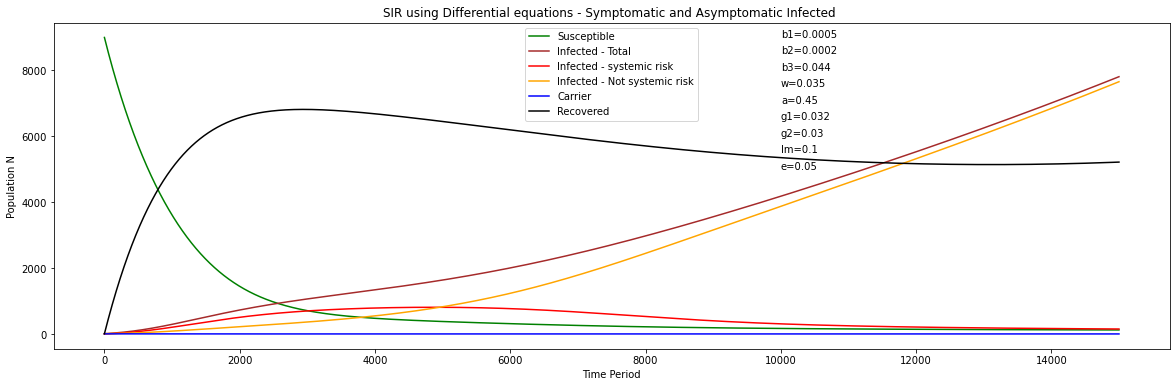

In [151]:
############ Change the values of parameter
b1=0.0005
b2=0.0002
b3=0.044
w=0.035
a=0.45
g1=0.032
g2=0.03
lm=0.1
e=0.05
###########################
S = 9000 #Defining the parameter of the function
Is = 1
In = 9
C = 5
R=0
n = 15000
############ plot
rk4(S, Is, In, C, R,n)

In [154]:
def rk4(S, Is, In,C,R,n):

   #calculate step size
   h=0.002
   S_list = []
   Is_list = []
   In_list = []
   I_total = []
   C_list = []
   R_list =[]
  
   total = S + Is + In  + C + R
    
   for i in range(1, n):
      N = S + Is + In  + C + R
      lam = 1
      
      if ((i % 2) == 0):
          lam = 0.5

      k1 = h * (susceptible(S, Is, In, R))

      l1 = h * (infected(S, Is, In,C))
        
      la1 = h *(infected_asym(S, Is,In,C))
    
      m1 = h * (re(Is, In,C))
      n1 = h*(res(S,In,R,C))
  
      
      k2 = h * (susceptible((S+(k1)/2),(Is+(l1)/2), (In+(la1)/2), (R+(m1)/2)))
  
      l2 = h * (infected((S+(k1)/2),(Is+(l1)/2),(In+(la1)/2),(C+(m1)/2)))
      la2 = h * (infected_asym((S+(k1)/2), (Is+(l1)/2),(In+(la1)/2),(C+ (m1)/2)))
      m2 = h * (re((Is+(l1)/2), (In+(la1)/2),(C+ (m1)/2)))
      n2 = h*(res((S+(k1)/2),(In+(la1)/2),(R+(n1)/2),(C+(m1)/2)))
     
      
      k3 = h * (susceptible((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2), (R+(m2)/2)))
      l3 = h * (infected((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      la3 = h * (infected_asym((S+(k2)/2), (Is+(l2)/2),(In+(la2)/2),(C+(m2)/2)))
      m3 = h * (re((Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      n3 = h*(res((S+(k2)/2),(In+(la2)/2),(R+(n2)/2),(C+(m2)/2)))
      
      k4 = h * (susceptible((S+(k3)), (Is+(l3)), (In+(la3)), (R+(m3))))
      l4 = h * (infected((S+k3), (Is+l3),(In+la3),(C+m3)))
      la4 = h * (infected_asym((S+k3),(Is+l3),(In+la3),(C +m3)))
      m4 = h * (re((Is+l3),(In+la3),(C+m3)))
      n4 = h*(res((S+(k3)),(In +(la3)),(R+(n3)),(C+(m3))))
      
      k = (k1 + (2 * k2) + (2 * k3) + k4) / 6
      S = S + k
      
      l = (l1 + (2 * l2) + (2 * l3) + l4) / 6
      Is = Is + l
      
      la = (la1 + (2 * la2) + (2 * la3) + la4) / 6
      In = In + la
      
      m = (m1 + (2 * m2) + (2 * m3) + m4) / 6
      C = C + m
    
      nn = (n1 + (2 * n2) + (2 * n3) + n4) / 6
      R = R + nn
      
    

      S_list.append(S)
      Is_list.append(Is)
      In_list.append(In)
      I_total.append((Is + In))
      C_list.append(C)
      R_list.append(R)
  
      
      if((S < 0) or (Is < 0) or (In < 0) or (C < 0) or (R<0) ):
         S = S - k
         Is = Is - l
         In = In - la
         C = C - m
         R = R - nn
    
         break
   peak_infections_index = I_total.index(max(I_total))

   plt.plot(list(range(len(S_list))), S_list, color = 'green')
   plt.plot(list(range(len(I_total))), I_total, color = 'brown')
   plt.plot(list(range(len(Is_list))), Is_list, color = 'red')
   plt.plot(list(range(len(In_list))), In_list, color = 'orange')
   plt.plot(list(range(len(C_list))), C_list, color = 'blue')
   plt.plot(list(range(len(R_list))), R_list, color = 'black')
  
  
   plt.gca().legend(['Susceptible', 'Infected - Total', 'Infected - systemic risk', 'Infected - Not systemic risk', 'Carrier', 'Recovered','w=10'])
   plt.title('SIR using Differential equations - Symptomatic and Asymptomatic Infected ')
   plt.rcParams["figure.figsize"] = (20,6)
   plt.xlabel("Time Period")
   plt.ylabel("Population N")
   plt.text(3700,6500,"b1=0.00051")
   plt.text(3700,6000,"b2=0.0002")
   plt.text(3700,5500,"b3=0.04")
   plt.text(3700,5000,"w=0.0035")
   plt.text(3700,4500,"a=0.045")
   plt.text(3700,4000,"g1=0.03")
   plt.text(3700,3500,"g2=0.03")
   plt.text(3700,3000,"lm=0.01")
   plt.text(3700,2500,"e=0.05")
   plt.show()
   plt.show()

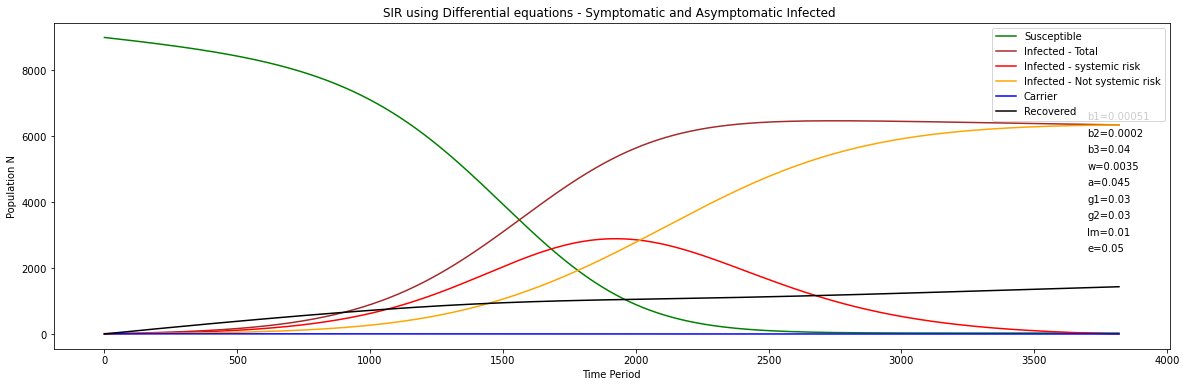

In [155]:
############ Change the values of parameter
b1=0.00051
b2=0.0002
b3=0.04
w=0.0035
a=0.045
g1=0.03
g2=0.03
lm=0.01
e=0.05
###########################
S = 9000 #Defining the parameter of the function
Is = 1
In = 9
C = 5
R=0
n = 15000
############ plot
rk4(S, Is, In, C, R,n)

In [156]:
def rk4(S, Is, In,C,R,n):

   #calculate step size
   h=0.002
   S_list = []
   Is_list = []
   In_list = []
   I_total = []
   C_list = []
   R_list =[]
  
   total = S + Is + In  + C + R
    
   for i in range(1, n):
      N = S + Is + In  + C + R
      lam = 1
      
      if ((i % 2) == 0):
          lam = 0.5

      k1 = h * (susceptible(S, Is, In, R))

      l1 = h * (infected(S, Is, In,C))
        
      la1 = h *(infected_asym(S, Is,In,C))
    
      m1 = h * (re(Is, In,C))
      n1 = h*(res(S,In,R,C))
  
      
      k2 = h * (susceptible((S+(k1)/2),(Is+(l1)/2), (In+(la1)/2), (R+(m1)/2)))
  
      l2 = h * (infected((S+(k1)/2),(Is+(l1)/2),(In+(la1)/2),(C+(m1)/2)))
      la2 = h * (infected_asym((S+(k1)/2), (Is+(l1)/2),(In+(la1)/2),(C+ (m1)/2)))
      m2 = h * (re((Is+(l1)/2), (In+(la1)/2),(C+ (m1)/2)))
      n2 = h*(res((S+(k1)/2),(In+(la1)/2),(R+(n1)/2),(C+(m1)/2)))
     
      
      k3 = h * (susceptible((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2), (R+(m2)/2)))
      l3 = h * (infected((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      la3 = h * (infected_asym((S+(k2)/2), (Is+(l2)/2),(In+(la2)/2),(C+(m2)/2)))
      m3 = h * (re((Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      n3 = h*(res((S+(k2)/2),(In+(la2)/2),(R+(n2)/2),(C+(m2)/2)))
      
      k4 = h * (susceptible((S+(k3)), (Is+(l3)), (In+(la3)), (R+(m3))))
      l4 = h * (infected((S+k3), (Is+l3),(In+la3),(C+m3)))
      la4 = h * (infected_asym((S+k3),(Is+l3),(In+la3),(C +m3)))
      m4 = h * (re((Is+l3),(In+la3),(C+m3)))
      n4 = h*(res((S+(k3)),(In +(la3)),(R+(n3)),(C+(m3))))
      
      k = (k1 + (2 * k2) + (2 * k3) + k4) / 6
      S = S + k
      
      l = (l1 + (2 * l2) + (2 * l3) + l4) / 6
      Is = Is + l
      
      la = (la1 + (2 * la2) + (2 * la3) + la4) / 6
      In = In + la
      
      m = (m1 + (2 * m2) + (2 * m3) + m4) / 6
      C = C + m
    
      nn = (n1 + (2 * n2) + (2 * n3) + n4) / 6
      R = R + nn
      
    

      S_list.append(S)
      Is_list.append(Is)
      In_list.append(In)
      I_total.append((Is + In))
      C_list.append(C)
      R_list.append(R)
  
      
      if((S < 0) or (Is < 0) or (In < 0) or (C < 0) or (R<0) ):
         S = S - k
         Is = Is - l
         In = In - la
         C = C - m
         R = R - nn
    
         break
   peak_infections_index = I_total.index(max(I_total))

   plt.plot(list(range(len(S_list))), S_list, color = 'green')
   plt.plot(list(range(len(I_total))), I_total, color = 'brown')
   plt.plot(list(range(len(Is_list))), Is_list, color = 'red')
   plt.plot(list(range(len(In_list))), In_list, color = 'orange')
   plt.plot(list(range(len(C_list))), C_list, color = 'blue')
   plt.plot(list(range(len(R_list))), R_list, color = 'black')
  
  
   plt.gca().legend(['Susceptible', 'Infected - Total', 'Infected - systemic risk', 'Infected - Not systemic risk', 'Carrier', 'Recovered','w=10'])
   plt.title('SIR using Differential equations - Symptomatic and Asymptomatic Infected ')
   plt.rcParams["figure.figsize"] = (20,6)
   plt.xlabel("Time Period")
   plt.ylabel("Population N")
   plt.text(3700,6500,"b1=0.0005")
   plt.text(3700,6000,"b2=0.0002")
   plt.text(3700,5500,"b3=0.04")
   plt.text(3700,5000,"w=0.0035")
   plt.text(3700,4500,"a=0.045")
   plt.text(3700,4000,"g1=0.03")
   plt.text(3700,3500,"g2=0.03")
   plt.text(3700,3000,"lm=0.15")
   plt.text(3700,2500,"e=0.05")
   plt.show()
   plt.show()

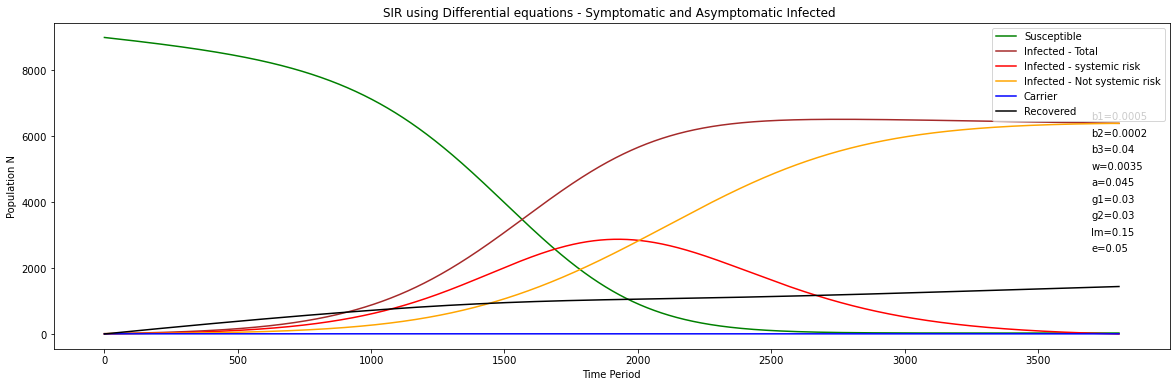

In [157]:
############ Change the values of parameter
b1=0.0005
b2=0.0002
b3=0.04
w=0.0035
a=0.045
g1=0.03
g2=0.03
lm=0.15
e=0.05
###########################
S = 9000 #Defining the parameter of the function
Is = 1
In = 9
C = 5
R=0
n = 15000
############ plot
rk4(S, Is, In, C, R,n)

In [160]:
def rk4(S, Is, In,C,R,n):

   #calculate step size
   h=0.002
   S_list = []
   Is_list = []
   In_list = []
   I_total = []
   C_list = []
   R_list =[]
  
   total = S + Is + In  + C + R
    
   for i in range(1, n):
      N = S + Is + In  + C + R
      lam = 1
      
      if ((i % 2) == 0):
          lam = 0.5

      k1 = h * (susceptible(S, Is, In, R))

      l1 = h * (infected(S, Is, In,C))
        
      la1 = h *(infected_asym(S, Is,In,C))
    
      m1 = h * (re(Is, In,C))
      n1 = h*(res(S,In,R,C))
  
      
      k2 = h * (susceptible((S+(k1)/2),(Is+(l1)/2), (In+(la1)/2), (R+(m1)/2)))
  
      l2 = h * (infected((S+(k1)/2),(Is+(l1)/2),(In+(la1)/2),(C+(m1)/2)))
      la2 = h * (infected_asym((S+(k1)/2), (Is+(l1)/2),(In+(la1)/2),(C+ (m1)/2)))
      m2 = h * (re((Is+(l1)/2), (In+(la1)/2),(C+ (m1)/2)))
      n2 = h*(res((S+(k1)/2),(In+(la1)/2),(R+(n1)/2),(C+(m1)/2)))
     
      
      k3 = h * (susceptible((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2), (R+(m2)/2)))
      l3 = h * (infected((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      la3 = h * (infected_asym((S+(k2)/2), (Is+(l2)/2),(In+(la2)/2),(C+(m2)/2)))
      m3 = h * (re((Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      n3 = h*(res((S+(k2)/2),(In+(la2)/2),(R+(n2)/2),(C+(m2)/2)))
      
      k4 = h * (susceptible((S+(k3)), (Is+(l3)), (In+(la3)), (R+(m3))))
      l4 = h * (infected((S+k3), (Is+l3),(In+la3),(C+m3)))
      la4 = h * (infected_asym((S+k3),(Is+l3),(In+la3),(C +m3)))
      m4 = h * (re((Is+l3),(In+la3),(C+m3)))
      n4 = h*(res((S+(k3)),(In +(la3)),(R+(n3)),(C+(m3))))
      
      k = (k1 + (2 * k2) + (2 * k3) + k4) / 6
      S = S + k
      
      l = (l1 + (2 * l2) + (2 * l3) + l4) / 6
      Is = Is + l
      
      la = (la1 + (2 * la2) + (2 * la3) + la4) / 6
      In = In + la
      
      m = (m1 + (2 * m2) + (2 * m3) + m4) / 6
      C = C + m
    
      nn = (n1 + (2 * n2) + (2 * n3) + n4) / 6
      R = R + nn
      
    

      S_list.append(S)
      Is_list.append(Is)
      In_list.append(In)
      I_total.append((Is + In))
      C_list.append(C)
      R_list.append(R)
  
      
      if((S < 0) or (Is < 0) or (In < 0) or (C < 0) or (R<0) ):
         S = S - k
         Is = Is - l
         In = In - la
         C = C - m
         R = R - nn
    
         break
   peak_infections_index = I_total.index(max(I_total))

   plt.plot(list(range(len(S_list))), S_list, color = 'green')
   plt.plot(list(range(len(I_total))), I_total, color = 'brown')
   plt.plot(list(range(len(Is_list))), Is_list, color = 'red')
   plt.plot(list(range(len(In_list))), In_list, color = 'orange')
   plt.plot(list(range(len(C_list))), C_list, color = 'blue')
   plt.plot(list(range(len(R_list))), R_list, color = 'black')
  
  
   plt.gca().legend(['Susceptible', 'Infected - Total', 'Infected - systemic risk', 'Infected - Not systemic risk', 'Carrier', 'Recovered','w=10'])
   plt.title('SIR using Differential equations - Symptomatic and Asymptomatic Infected ')
   plt.rcParams["figure.figsize"] = (20,6)
   plt.xlabel("Time Period")
   plt.ylabel("Population N")
   plt.text(4500,5500,"b1=0.00052")
   plt.text(4500,5000,"b2=0.0002")
   plt.text(4500,4500,"b3=0.04")
   plt.text(4500,4000,"w=0.035")
   plt.text(4500,3500,"a=0.145")
   plt.text(4500,3000,"g1=0.103")
   plt.text(4500,2500,"g2=0.035")
   plt.text(4500,2000,"lm=0.1")
   plt.text(4500,1500,"e=0.05")
   plt.show()
   plt.show()

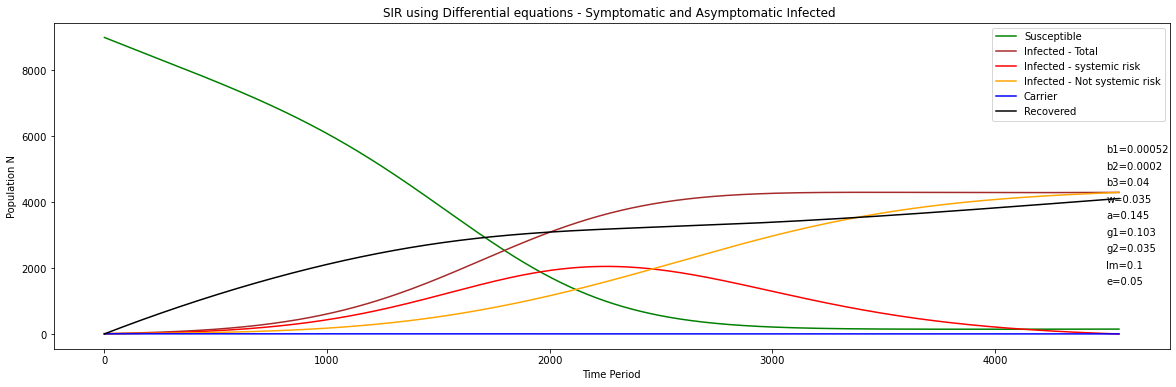

In [161]:
############ Change the values of parameter
b1=0.00052
b2=0.0002
b3=0.04
w=0.035
a=0.145
g1=0.103
g2=0.035
lm=0.1
e=0.05
###########################
S = 9000 #Defining the parameter of the function
Is = 1
In = 9
C = 5
R=0
n = 15000
############ plot
rk4(S, Is, In, C, R,n)

In [166]:
def rk4(S, Is, In,C,R,n):

   #calculate step size
   h=0.002
   S_list = []
   Is_list = []
   In_list = []
   I_total = []
   C_list = []
   R_list =[]
  
   total = S + Is + In  + C + R
    
   for i in range(1, n):
      N = S + Is + In  + C + R
      lam = 1
      
      if ((i % 2) == 0):
          lam = 0.5

      k1 = h * (susceptible(S, Is, In, R))

      l1 = h * (infected(S, Is, In,C))
        
      la1 = h *(infected_asym(S, Is,In,C))
    
      m1 = h * (re(Is, In,C))
      n1 = h*(res(S,In,R,C))
  
      
      k2 = h * (susceptible((S+(k1)/2),(Is+(l1)/2), (In+(la1)/2), (R+(m1)/2)))
  
      l2 = h * (infected((S+(k1)/2),(Is+(l1)/2),(In+(la1)/2),(C+(m1)/2)))
      la2 = h * (infected_asym((S+(k1)/2), (Is+(l1)/2),(In+(la1)/2),(C+ (m1)/2)))
      m2 = h * (re((Is+(l1)/2), (In+(la1)/2),(C+ (m1)/2)))
      n2 = h*(res((S+(k1)/2),(In+(la1)/2),(R+(n1)/2),(C+(m1)/2)))
     
      
      k3 = h * (susceptible((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2), (R+(m2)/2)))
      l3 = h * (infected((S+(k2)/2), (Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      la3 = h * (infected_asym((S+(k2)/2), (Is+(l2)/2),(In+(la2)/2),(C+(m2)/2)))
      m3 = h * (re((Is+(l2)/2), (In+(la2)/2),(C+(m2)/2)))
      n3 = h*(res((S+(k2)/2),(In+(la2)/2),(R+(n2)/2),(C+(m2)/2)))
      
      k4 = h * (susceptible((S+(k3)), (Is+(l3)), (In+(la3)), (R+(m3))))
      l4 = h * (infected((S+k3), (Is+l3),(In+la3),(C+m3)))
      la4 = h * (infected_asym((S+k3),(Is+l3),(In+la3),(C +m3)))
      m4 = h * (re((Is+l3),(In+la3),(C+m3)))
      n4 = h*(res((S+(k3)),(In +(la3)),(R+(n3)),(C+(m3))))
      
      k = (k1 + (2 * k2) + (2 * k3) + k4) / 6
      S = S + k
      
      l = (l1 + (2 * l2) + (2 * l3) + l4) / 6
      Is = Is + l
      
      la = (la1 + (2 * la2) + (2 * la3) + la4) / 6
      In = In + la
      
      m = (m1 + (2 * m2) + (2 * m3) + m4) / 6
      C = C + m
    
      nn = (n1 + (2 * n2) + (2 * n3) + n4) / 6
      R = R + nn
      
    

      S_list.append(S)
      Is_list.append(Is)
      In_list.append(In)
      I_total.append((Is + In))
      C_list.append(C)
      R_list.append(R)
  
      
      if((S < 0) or (Is < 0) or (In < 0) or (C < 0) or (R<0) ):
         S = S - k
         Is = Is - l
         In = In - la
         C = C - m
         R = R - nn
    
         break
   peak_infections_index = I_total.index(max(I_total))

   plt.plot(list(range(len(S_list))), S_list, color = 'green')
   plt.plot(list(range(len(I_total))), I_total, color = 'brown')
   plt.plot(list(range(len(Is_list))), Is_list, color = 'red')
   plt.plot(list(range(len(In_list))), In_list, color = 'orange')
   plt.plot(list(range(len(C_list))), C_list, color = 'blue')
   plt.plot(list(range(len(R_list))), R_list, color = 'black')
  
  
   plt.gca().legend(['Susceptible', 'Infected - Total', 'Infected - systemic risk', 'Infected - Not systemic risk', 'Carrier', 'Recovered','w=10'])
   plt.title('SIR using Differential equations - Symptomatic and Asymptomatic Infected ')
   plt.rcParams["figure.figsize"] = (20,6)
   plt.xlabel("Time Period")
   plt.ylabel("Population N")
   plt.text(380,2900,"b1=0.00052")
   plt.text(380,2600,"b2=0.002")
   plt.text(380,2300,"b3=0.045")
   plt.text(380,2000,"w=0.035")
   plt.text(380,1700,"a=0.145")
   plt.text(380,1400,"g1=0.103")
   plt.text(380,1100,"g2=0.035")
   plt.text(380,800,"lm=0.124")
   plt.text(380,500,"e=0.105")
   plt.show()
   plt.show()

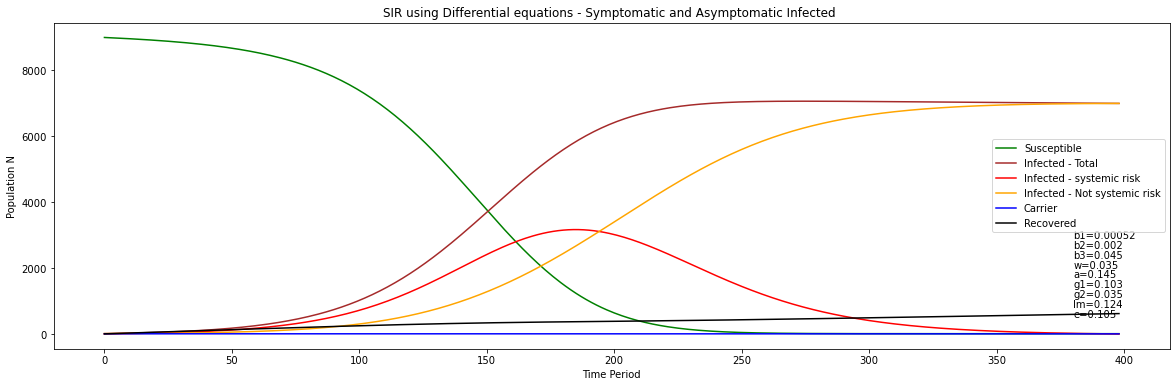

In [167]:
############ Change the values of parameter
b1=0.0052
b2=0.002
b3=0.045
w=0.035
a=0.145
g1=0.103
g2=0.035
lm=0.124
e=0.105
###########################
S = 9000 #Defining the parameter of the function
Is = 1
In = 9
C = 5
R=0
n = 15000
############ plot
rk4(S, Is, In, C, R,n)